# Challenge

## First Question

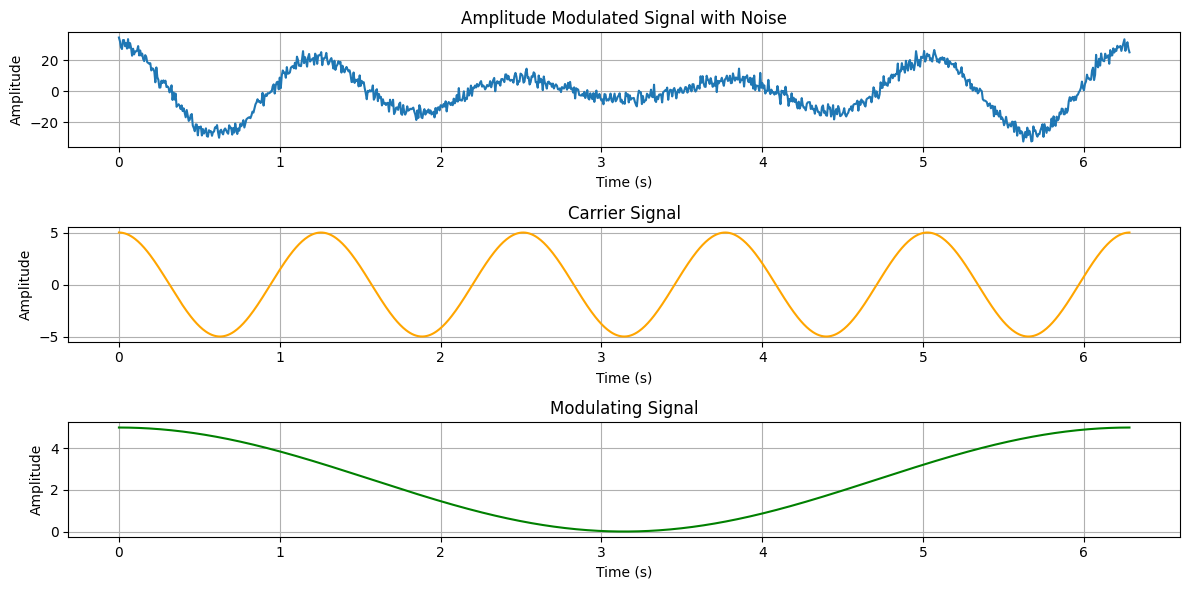

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100       # Sampling frequency
t = np.linspace(0, 2 * np.pi, fs)  # Time vector for 2 cycles
carrier_freq = 5  # Carrier frequency
modulating_freq = 1  # Modulating frequency
amplitude = 5     # Amplitude of the AM signal
noise_amplitude = 2.5  # Amplitude of the noise

# Generate the carrier and modulating signals
carrier = amplitude * np.cos(carrier_freq * t)
modulating = (amplitude / 2) * (1 + np.cos(modulating_freq * t))

# Generate noise
noise = noise_amplitude * np.random.normal(size=t.shape)

# Create the AM signal
am_signal = (1 + modulating) * carrier + noise

# Plotting the signals
plt.figure(figsize=(12, 6))

# AM Signal
plt.subplot(3, 1, 1)
plt.plot(t, am_signal)
plt.title('Amplitude Modulated Signal with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Carrier Signal
plt.subplot(3, 1, 2)
plt.plot(t, carrier, label='Carrier Signal', color='orange')
plt.title('Carrier Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Modulating Signal
plt.subplot(3, 1, 3)
plt.plot(t, modulating, label='Modulating Signal', color='green')
plt.title('Modulating Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()



## Second Question

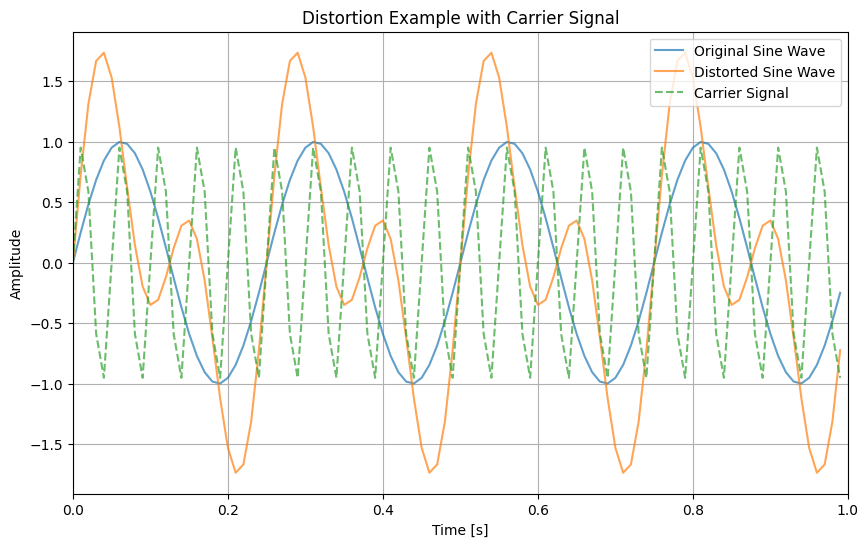

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 4  # Frequency of the message signal in Hz
carrier_frequency = 20  # Frequency of the carrier signal in Hz
sampling_rate = 100  # Sampling rate in Hz
duration = 1  # Duration of the signal in seconds
distortion_angle = 100  # Distortion angle in degrees
distortion_factor = np.sin(np.radians(distortion_angle))  # Convert angle to radians and get sine

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Original sine wave starting at zero
sine_wave = np.sin(2 * np.pi * frequency * t)

# Distorted sine wave (adding a harmonic)
distorted_sine_wave = sine_wave + distortion_factor * np.sin(2 * np.pi * 2 * frequency * t)

# Carrier signal
carrier_signal = np.sin(2 * np.pi * carrier_frequency * t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave, label='Original Sine Wave', alpha=0.7)
plt.plot(t, distorted_sine_wave, label='Distorted Sine Wave', alpha=0.7)
plt.plot(t, carrier_signal, label='Carrier Signal', linestyle='--', alpha=0.7)
plt.title('Distortion Example with Carrier Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(0, duration)  # Ensure the x-axis starts at 0
plt.show()

## Third Question

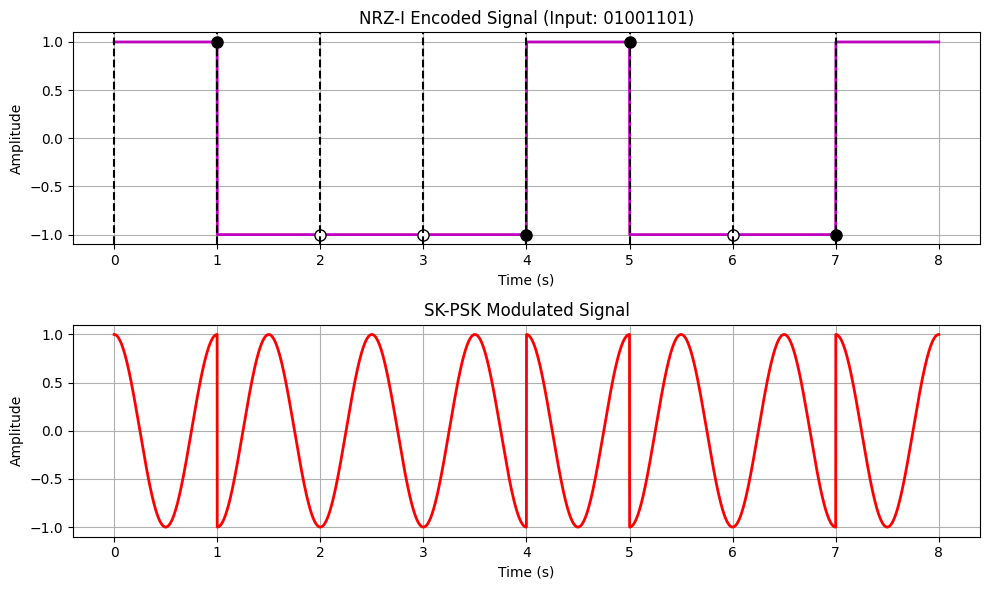

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
input_data = '01001101'  # Input binary data
amplitude = 1            # Integer amplitude
bit_rate = 1             # Bits per second (adjust as needed)
fs = 1000                # Sampling frequency (samples per second)
T = 1 / bit_rate         # Time period of a bit
num_samples_per_bit = int(fs * T)
total_samples = num_samples_per_bit * len(input_data)

# Time axis
t = np.linspace(0, T * len(input_data), total_samples)

# NRZ-I Encoding
def nrzi_encoding(data):
    output = []
    current_level = amplitude  # Start with high level (1 or -1)
    encoded_bits = []

    for bit in data:
        if bit == '1':
            current_level *= -1  # Invert level on '1'
        encoded_bits.append(current_level)  # Save the level for each bit
        output.extend([current_level] * num_samples_per_bit)  # Extend for plotting each bit

    return np.array(output), encoded_bits

# Modulate the signal (Phase Shift Keying - PSK)
def sk_psk_modulation(encoded_data):
    carrier_frequency = 2 * np.pi  # Carrier frequency for PSK modulation
    modulated_signal = encoded_data * np.cos(carrier_frequency * t)
    return modulated_signal

# NRZ-I encoding of input data
encoded_signal, encoded_bits = nrzi_encoding(input_data)

# SK-PSK modulation
modulated_signal = sk_psk_modulation(encoded_signal)

# Create the time markers for each bit for plotting
bit_time = np.arange(0, len(input_data)) * T

# Plot the result
plt.figure(figsize=(10, 6))

# Plot NRZ-I signal
plt.subplot(2, 1, 1)
plt.plot(t, encoded_signal, 'm', linewidth=2, label="NRZ-I")

# Adding markers to indicate state changes (bubbles before the transition)
for i in range(1, len(input_data)):  # Start from the second bit to capture transitions
    if input_data[i] == '1':  # Inversion occurs on '1'
        # Show bubble at the previous level before the inversion
        plt.plot(bit_time[i], encoded_bits[i-1], 'ko', markersize=8)  # Filled circle before transition
    else:
        plt.plot(bit_time[i], encoded_bits[i-1], 'wo', markersize=8, markeredgecolor='black')  # Unfilled circle at steady state

# Adding grid lines for bit boundaries
for i in range(len(input_data)):
    plt.axvline(x=i * T, color='black', linestyle='--')

# Labeling for NRZ-I
plt.title("NRZ-I Encoded Signal (Input: 01001101)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Adjust the limits so the signal sticks to the border
plt.ylim([-1.1, 1.1])

# Plot SK-PSK modulated signal
plt.subplot(2, 1, 2)
plt.plot(t, modulated_signal, 'r', linewidth=2)
plt.title("SK-PSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Adjust the limits to make it fit within the borders
plt.ylim([-1.1, 1.1])

# Final layout and show plot
plt.tight_layout()
plt.show()
